# Korrektur

Viel Erfolg!

### Bewertung

#### _/17 Punkte

----

#### Bitte lösen sie die Aufgaben 
- innerhalb dieses Notebooks 
- welches Sie bitte umbenennen in `A01_IHRNAME.ipynb` (IHRNAME passend ersetzen)

und schicken 

#### bis zum <span style="color:red">Montag 11. Juni 2018 23:00</span>
eine Email
- mit Betreff `Angewandte Statistik II`
- an `uli.wannek@uni-tuebingen.de`
- mit dem ausgeführten Notebook als Anhang

#### Danke!

### Hinweise
- Text-Antworten sowie $\LaTeX$-Formeln am besten in *markdown* Zellen
    - Sie müssen nicht, dürfen aber durchaus, Text in `print('')`-Anweisungen ausgeben
    - Wenn Sie Ergebnisse aus Zellen verwenden ist `print('{}'.format())` in code-Zellen hingegen extrem praktisch
- Sie dürfen in diesem Notebook gerne alles, was nicht zu den Aufgaben gehört, löschen.
- Sie dürfen gerne (zu Ihrem späteren **und** meinem jetzigen Verständnis) Kommentare in weiteren markdown-Zellen einfügen. Das hilft wirklich!
- Es gibt Punkte für
    - Ihre Überlegung
    - Ihr Programm
    - Ihre Kommentare(!)
    - und schließlich für das richtige Ergebnis
    - mit Zusammenfassung wie zB.: *"der Mittelwert beträgt 17km/h"*
- Sie dürfen (müssen aber nicht) alle Antworten natürlich auch auch auf Deutsch verfassen.
- Lediglich Kommentare in Code-Zellen sollten (müssen aber nicht) englisch sein.    

#### Zu erreichende Punkte
(17 Punkte)

----

# ICA & PCA

In [456]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
from scipy import stats                  # statistic methods

# self add
from IPython.lib.display import Audio
%matplotlib inline

# Aufgabe 1: Korrelation und PCA

Sie haben zwei Messreihen $x_0$ und $x_1$, von denen Sie vermuten, daß sie beide aus zwei *getrennten* Ursachen (Quellen) zusammengesetzt sind. Laden Sie die Datendatei mit den beiden Messreihen.

    X = np.loadtxt('waves.txt')
    print(X.shape)

In [457]:
X = np.loadtxt('waves.txt')
mean = X.mean()
print(X.shape)
x0 = X[0, :]
x1 = X[1, :]

(2, 2881)


### a) Laden sie die Daten und plotten die beiden Messreihen in X  (in Abhängigkeit der Zeit, =Index)
Was sehen Sie? Beschreibung!

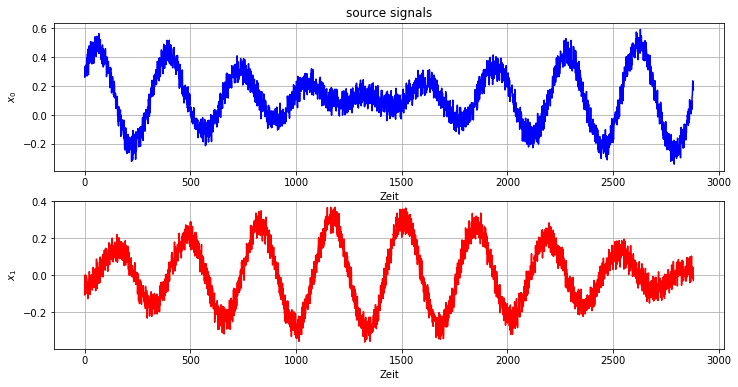

In [458]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(2,1,1)
plt.title('source signals')
plt.plot(x0, 'b-');
plt.ylabel('$x_0$')
plt.grid(True)
plt.xlabel('Zeit');
fig.add_subplot(2,1,2)
plt.plot(x1, 'r-');
plt.ylabel('$x_1$');
plt.grid(True)
plt.xlabel('Zeit');

Es gibt zwei verschiedene Messreihen, eine ist zuerst sinkend und dann steigend. Zweite ist ganz anders als erst, nämlich zuerst steigend und dann sinkend. Aber die Frequenz der beiden Messreihen ist etwa gleich.

### b) Sind diese beiden Messreihen X[0] und X[1] unabhängig?
Was berechnen Sie dazu und was ist Ihr Ergebnis mit Begründung?

In [459]:
"""Kovarianz"""
C = np.cov(X)
print('Kovarianzmatrix:\n{}'.format(C))

Kovarianzmatrix:
[[ 0.03426142 -0.00148167]
 [-0.00148167  0.02675666]]


Kovarianzmatrix wird berechnet, weil es mit linearer Zusammenhang verbindet.
Wenn Kovarianz nicht nah 0, gibt es linear Zusammenhang.

$$\mathrm{Cov}(\mathbf{X}) = \mathcal{E}[ (\mathbf{X}-\boldsymbol{\mu})(\mathbf{X}-\boldsymbol{\mu})^T ] = 
\begin{pmatrix} 
\mathrm{Var}(X_1)      & \mathrm{Cov}(X_1,X_2) \\
\mathrm{Cov}(X_1, X_2) &\mathrm{Var}( X_2)
\end{pmatrix}$$

### c) Was würde eine PCA daraus machen?
Plotten Sie zur Anschauung die beiden Messreihen gegeneinander

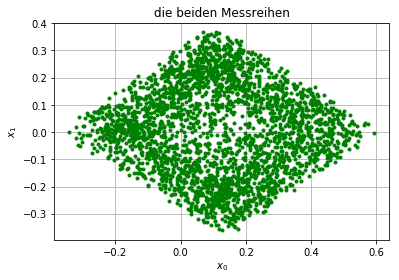

In [460]:
# draw x0 and x1 gegeneinander
plt.plot(x0, x1, 'g.')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('die beiden Messreihen')
plt.grid(True)


### d) Führen Sie eine PCA durch
mit dem Ziel, eine 2x2 Projektionsmatrix zu erhalten und geben diese an

Projektionsmatrix:
[[ 0.98237351 -0.18692854]
 [-0.18692854 -0.98237351]]
(2, 2881)


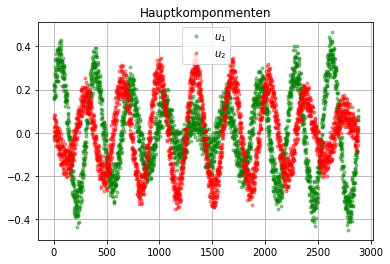

In [461]:
# from sklearn import PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2);
Z = pca.fit_transform(X.T).T;
B = pca.components_;
print('Projektionsmatrix:\n{}'.format(B))

print(Z.shape)
plt.title('Hauptkomponmenten')
plt.plot(Z[0,:], 'g.', Alpha=.4);
plt.plot(Z[1,:], 'r.', Alpha=.4);
plt.legend(['$u_1$', '$u_2$']);
plt.grid(True)

### e) Projektion auf die Hauptkomponenten

Lassen Sie `pca` die Projektion der beiden gemischten Signale $X_i$ auf die beiden in d) gefundenen Hauptkomponenten berechnen und nennen diese $Z_i$

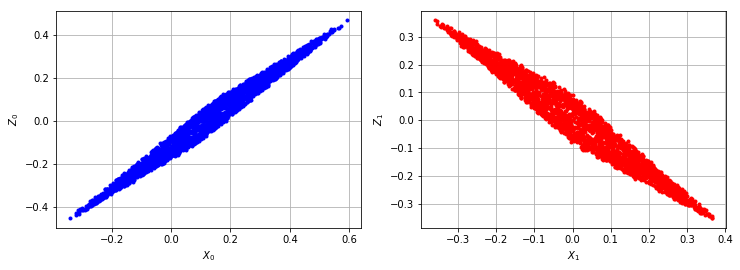

In [462]:
# X = np.dot(B, Z)
z0 = Z[0,:]
z1 = Z[1,:]
# plt.plot(S[0,:], 'g.', Alpha=.4);
# plt.plot(S[1,:], 'r.', Alpha=.4);
# Cz = np.cov(z0, z1)

fig = plt.figure(figsize=(12,4))
# x0~z0
fig.add_subplot(1,2,1)
plt.plot(x0, z0, 'b.')
plt.grid(True)
plt.xlabel('$X_0$')
plt.ylabel('$Z_0$')

# x1~z1
fig.add_subplot(1,2,2)
plt.plot(x1, z1, 'r.')
plt.grid(True)
plt.xlabel('$X_1$');
plt.ylabel('$Z_1$');


### f) Sind die beiden Z[0] und Z[1] jetzt unabhängig voneinander?
Plotten Sie zum einen Z[0] und Z[1] gegen die Zeit und zum anderen Z[0] gegen Z[1]

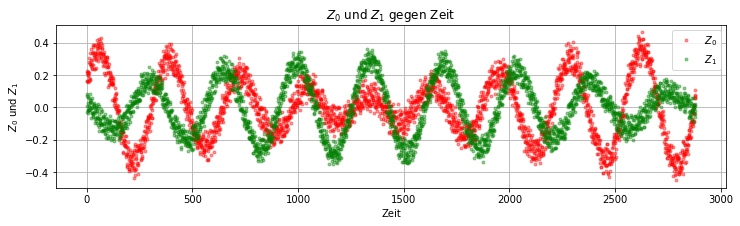

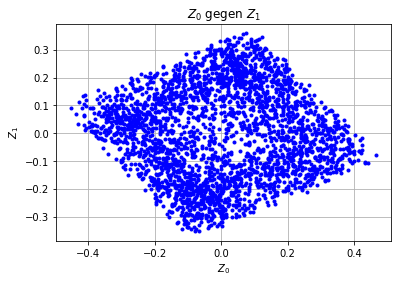

In [463]:
fig = plt.figure(figsize=(12,3))
# fig.add_subplot(1,2,1)
plt.title('$Z_0$ und $Z_1$ gegen Zeit')
plt.plot(z0, 'r.', Alpha=.4);
plt.xlabel('Zeit');
plt.ylabel('$Z_0$ und $Z_1$');
plt.plot(z1, 'g.', Alpha=.4);
plt.grid(True)
plt.legend(['$Z_0$', '$Z_1$'])

fig = plt.figure()
plt.plot(z0, z1, 'b.');
plt.xlabel('$Z_0$');
plt.ylabel('$Z_1$');
plt.title('$Z_0$ gegen $Z_1$')
plt.grid(True)

In [464]:
Cz = np.cov(z0, z1)
print('Cz:\n{}'.format(Cz))

Cz:
[[ 3.45433607e-02 -7.70988212e-19]
 [-7.70988212e-19  2.64747268e-02]]


### g) Konnten Sie also die Quellen der beiden gemischten Signale finden?

In [465]:
Cz = np.cov(z0, z1)
print('Cz:\n{}'.format(Cz))

Cz:
[[ 3.45433607e-02 -7.70988212e-19]
 [-7.70988212e-19  2.64747268e-02]]


Von Ergebnis der Rechnung zeigt, dass Kovarianzmatrix ein Diagonalmatrix ist.

(3,5 Punkte)

----

# Aufgabe 2: ICA (von Hand)

Die selben Daten aus Aufgabe 1), aber Sie vermuten zwei gemischte, aus *unabhängigen* Quellen stammende Signale.

### a) Berechnen Sie die Kurtosis von X[0] und X[1] und von Z[0] und Z[1]
von den durch PCA in Aufgabe 1) erhaltenen dekorrelierten Signalen.

Was schließen Sie aus dem Kurtosis-Vergleich X bzw Z?

In [466]:
from scipy import stats

# use stats
k1, k2, k3, k4 = (stats.kurtosis(x0),
                 stats.kurtosis(x1),
                 stats.kurtosis(z0),
                 stats.kurtosis(z1))

def kurtosis(v):
    vm = v.mean()
    segma = np.sqrt(np.var(v))
    k = np.sum((v-vm)**4/(segma**4))/len(v)-3
    return k

# compute by hand
k1, k2, k3, k4 = kurtosis(x0), kurtosis(x1), kurtosis(z0), kurtosis(z1)

print('Kurtosis of mixtures\tx0 = {:.4f}\tx1 = {:.4f}\n'
     '      and of sources\tz0 = {:.4f}\tz1 = {:.4f}'
     .format(k1, k2, k3, k4))


Kurtosis of mixtures	x0 = -0.6017	x1 = -0.8886
      and of sources	z0 = -0.7111	z1 = -0.9718


Von Folien wisse ich, Kurtosis beschreibt wie spitz oder flach die Verteilung verlaeuft. Wenn es eine Normalvertilung ist, hat Kurtosis $K=0$. Die Kurtosis der spitere Verteilungen "super Gauss" hat $K\gt 0$

### b) Zeichnen Sie die vier Histogramme
beschriften Sie sie x0, x1, z0 und z1, benutzen Sie *gleiche, sinnvolle* Bineinteilung und wenn Sie zwei Histogramme in eine Graphik zeichnen erhalten Sie Transparenz durch den Parameter `alpha=0.4`.
- Erklären Sie: welches Histogramm hat welche Kurtosis?

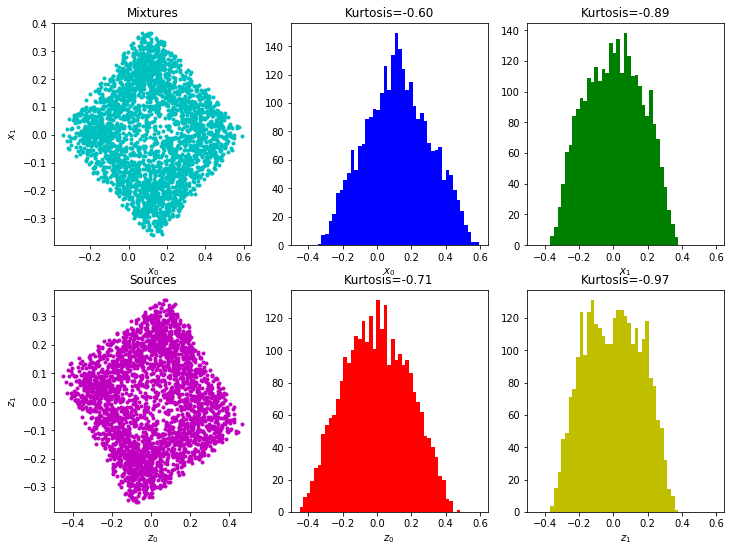

In [467]:
fig = plt.figure(figsize=(12,9))
for i, data, col, tit, lbl in zip([1, 4], 
                                  [(x0, x1), (z0, z1)], 
                                  ['c', 'm'], 
                                  ['Mixtures', 'Sources'], 
                                  [('$x_0$', '$x_1$'), ('$z_0$', '$z_1$')]):
    fig.add_subplot(2, 3, i)
    plt.title(tit)
    plt.plot(data[0], data[1], col+'.')
    plt.xlabel(lbl[0])
    plt.ylabel(lbl[1]);

bins = np.linspace(min(z0), max(x0), 50)
for i, data, col, lbl, k in zip([2, 3, 5, 6],
                                [x0, x1, z0, z1],
                                ['b', 'g', 'r', 'y'],
                                ['$x_0$', '$x_1$', '$z_0$', '$z_1$'],
                                [k1, k2, k3, k4]):
    fig.add_subplot(2, 3, i)
    plt.hist(data, bins, color=col)
    plt.xlabel(lbl);
    plt.title('Kurtosis={:.2f}'.format(k))


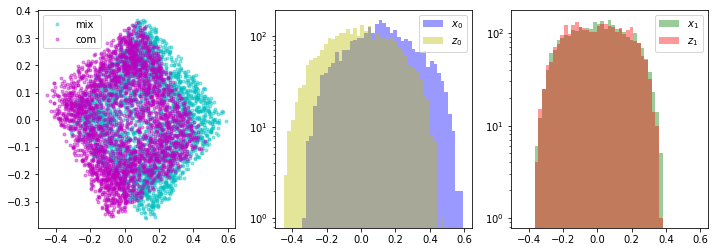

In [468]:
'''compare distributions of sources vs. mixtures'''
fig = plt.figure(figsize=(12, 4)) # lots of space for 3 sub graphs
fig.add_subplot(1, 3, 1) # 1st sub figure: left
# plt.axis((-20000, 20000, -20000, 20000)) # equal borders in x and y direction 
# plt.gca().get_xaxis().set_visible(False) # no labels, ticks, numbers at axis
# plt.gca().get_yaxis().set_visible(False)
# left most graph: sources vs. mixtures data
for i, data, col, lb in zip([1, 4], [(x0, x1), (z0, z1)], 
                            ['c', 'm'], ['mix', 'com']):
    plt.plot(data[0], data[1], col+'.', alpha=.4, label=lb)
    plt.legend(loc='upper left');

# middle and right graph: distribution of source-mixture pairs
# bins = np.linspace(-8000, 8000, 40)
for i, data, col, lb in zip([2, 3], 
                            [(x0, z0), (x1, z1)], 
                            [('b', 'y'), ('g', 'r')], 
                            [('$x_0$', '$z_0$'), ('$x_1$','$z_1$')]):
    fig.add_subplot(1, 3, i) # 2nd or 3rd sub figure
    for j in range(2): # draw the both signals
        plt.hist(data[j], bins, color=col[j], log=True, alpha=.4, label=lb[j])
    plt.legend(loc='upper right');

### c) Projection Pursuit
Den Raum der möglichen Projektionen können Sie mittels Einheitsvektoren abtasten. Die beste Entmischung ist gesucht. Berechnen Sie dazu zu jeder möglichen Projektion der $Z_i$ (1° Schritte in 360° genügt) die entstehende Kurtosis.

#### Zeichnen Sie eine Graphik dieser Kurtosis in Abhängigkeit vom Projektions-Winkel

#### Zeichnen Sie die Kurtosis in eine Graphik X[0] gegen X[1] je  Projektions-Winkel ein
Orientieren Sie sich am Beispiel aus der Vorlesung

#### Zeichen Sie den gesuchten Extremwert ein
Was fällt Ihnen auf?

In [469]:
def kurtosis_step(phi):
    '''
    calculates kurtosis and its x- and y-components for one angle phi
    input: phi
    output: (kurtosis, kurtosis-x, kurtosis-y)
    '''
    # projections under angle phi to x, y
    cos_phi, sin_phi = np.cos(phi), np.sin(phi)
    # test demixing unit vector in direction phi
    testvector = cos_phi * x0 + sin_phi * x1
    # scipy.stats contains kurtosis()
    # kurt = stats.kurtosis(testvector)
    kurt = kurtosis(testvector)
    # kurtosis and its x- and y-contribution
    return kurt, cos_phi * kurt, sin_phi * kurt

# cycle around in half degree
nst = 360

# calculate kurtosis for (de)mixtures of cc and dd in 360 steps around 360°
kurts, kx, ky = np.asarray(
    [kurtosis_step(p) for p in np.linspace(0, 2 * np.pi, nst+1)]).T
kmaxindex = np.argmax(kurts) # search index of maximum
kmax = kurts[kmaxindex]      # and value of max kurtosis
print('maximum kurtosis ={:.4f} @ {:.2f}°'
      .format(kurts[kmaxindex], kmaxindex/2))
# print('kx:\n{}, {}\nky:\n{}, {}'.format(min(kx), max(kx), min(ky), max(ky)))

maximum kurtosis =-0.5945 @ 91.50°


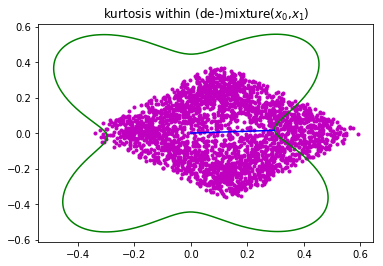

In [470]:
'''
Graphik dieser Kurtosis in Abhängigkeit vom Projektions-Winkel
die Kurtosis in eine Graphik X[0] gegen X[1] je Projektions-Winkel ein
'''
fig = plt.figure()
plt.title('kurtosis within (de-)mixture($x_0$,$x_1$)')
plt.plot(x0, x1, 'm.') # mixture data X
plt.plot(.5*kx, .5*ky,'g-') # kurtosis(phi) in x and y directions
plt.plot((0., .5*kx[kmaxindex]),(0., .5*ky[kmaxindex]), 'b-');

"best" unmixing direction would be: [-0.02617695  0.99965732]


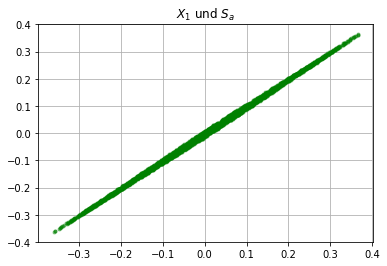

In [471]:
phimax = kmaxindex/360.*np.pi
W1 = np.array([np.cos(phimax), np.sin(phimax)])
print('"best" unmixing direction would be: {}'.format(W1))

# =================================================================

'''project mixtures (back) to (one) source'''
s_a = W1.dot(X) # project mixtures to hypothetical source candidate
fig = plt.figure()
plt.plot(x1, s_a, 'g.', Alpha=.4) # and compare with the (2nd) real source
plt.title('$X_1$ und $S_a$');
plt.grid(True);


In [472]:
'''calculate covariance for (de)mixtures in .5° steps around 360°'''
def step(phi):
    '''
    calculates covariance and its x- and y-components for one angle phi
    input: phi
    output: (covariance, cov-x, cov-y)
    '''
    cos_phi, sin_phi = np.cos(phi), np.sin(phi)
    # test demixing data in direction phi
    testvector = cos_phi*x0 + sin_phi*x1
    # calculate covariance test % found
    cov = np.cov(s_a, testvector)[0, 1]
    # covariance and projections to x and y
    return cov, cos_phi * cov, sin_phi * cov

phis = np.linspace(0, 2.*np.pi, nst+1)
# calculate covariance and projections
covs, cx, cy = np.asarray([step(p) for p in phis]).T

zero covariance =-0.00 @ (0.996, 0.087)
[ 0.96234339 -0.27183671]


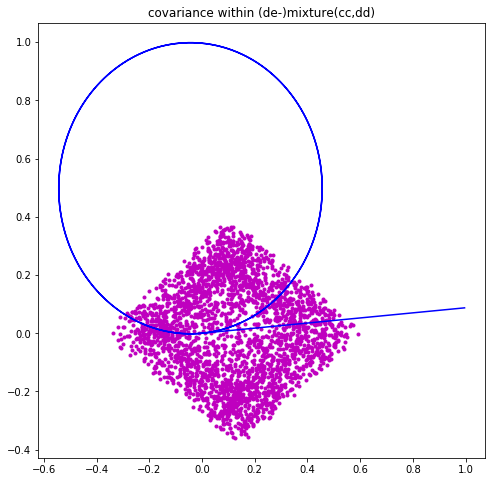

In [473]:
plt.figure(figsize=(8, 8))
plt.title('covariance within (de-)mixture(cc,dd)')
plt.plot(x0, x1, 'm.') # mixing data
kmax = covs.max() # normalize

# print('kmax:{:.4f}, cx:{}, cy:{}'.format(kmax, cx.shape, cy.shape))
kxplt = cx/kmax
kyplt = cy/kmax
plt.plot( kxplt, kyplt, 'b-') # covariances

# which index (angle) is nearest to zero?
kzero = np.min(np.abs(covs))

try:
    # check if near-zero in positive half
    kzeroindex = np.where(covs==kzero)[0][0]
except IndexError: # -or-
    # in (slightly) negative half
    kzeroindex = np.where(covs==-kzero)[0][0]

# projection to that angle of index
cosphi = np.cos(phis[kzeroindex])
sinphi = np.sin(phis[kzeroindex])
print('zero covariance ={:.2f} @ ({:.3f}, {:.3f})'
      .format(covs[kzeroindex], cosphi, sinphi))

# draw the vector for zero covariance
plt.plot((0., cosphi),(0., sinphi), 'b-');
print( np.dot(np.array([cosphi,sinphi]), B) )

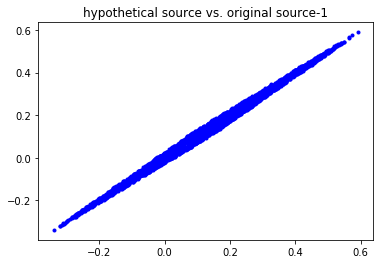

In [474]:
# second hypothetical source orthogonal to first
s_b = cosphi*x0 + sinphi*x1
plt.plot(x0, s_b, 'b.')
plt.title('hypothetical source vs. original source-1');

### d) [Bonus] wo finden Sie die Kurtosis-Werte
aus a) in der (ersten) Graphik von c)?

Aus a) habe gewissen,
```
Kurtosis of mixtures	x0 = -0.6017	x1 = -0.8886
      and of sources	z0 = -0.7111	z1 = -0.9718
```
Dann von c) habe 360 Schritt durchgesucht, findet es,

```
maximum kurtosis =-0.5945 @ 91.50°
```

(3,5+0.5 Punkte)

----

# Aufgabe 3: ICA (mittels `sklearn`)

### a) Führen Sie eine fastICA durch
idealerweise im Anschluß an Aufgabe 2) mit den selben Daten wie in Aufgabe 1). Nennen Sie die zurückgegebenen entmischten Daten Y.

Transponieren Sie dazu gegebenenfalls die zu übergebenden und zurückgegebenen Daten passend und **beschreiben** Sie die Formen der jeweiligen Daten mit **Begründung**.

In [475]:
from sklearn.decomposition import FastICA, PCA

ica = FastICA(n_components=2)
Y = ica.fit_transform(X.T)
B = ica.mixing_
print(Y.T.shape)
print('X:{}, in:{}\nY:{}, B:{}'.format(X.shape, X.T.shape, Y.shape, B.shape))
print(B)

(2, 2881)
X:(2, 2881), in:(2881, 2)
Y:(2881, 2), B:(2, 2)
[[ 7.38691627 -6.64126266]
 [-6.18142107 -6.23291455]]


### b) Plotten Sie die beiden entmischten Signale Y[0] gegen Y[1]
Was ist Y[0] und Y[1]?

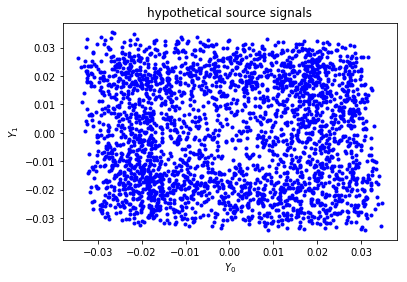

In [476]:
y0 = Y[:,0]
y1 = Y[:,1]
flg = plt.figure()
plt.title('hypothetical source signals')
plt.plot(y0, y1, 'b.');
plt.xlabel('$Y_0$')
plt.ylabel('$Y_1$');

$Y_0$ und $Y_1$ sind Hepothses-Quellesignals.

### c) Sind die beiden Y[0] und Y[1] unabhängig voneinander?
Was berechnen Sie? Ihr Ergebnis also? Mit Begründung...

In [477]:
C = np.cov(y0, y1)
print(C)

[[ 3.47222222e-04 -2.33705802e-19]
 [-2.33705802e-19  3.47222222e-04]]


Ich habe Kovarianzmatrix berechnet. Mein Ergebnis ist:
```
[[3.47222222e-04 3.49354033e-19]
 [3.49354033e-19 3.47222222e-04]]
 ```
 Kovarianzmatrix ist ein Diagonalmatrix, d.h. Kovarianz ist nah 0, deshalb gibt es kein linear Zusammenhang zwischen $Y_0$ und $Y_1$.

### d) Wie groß ist die Kurtosis von Y[0] und Y[1]? 
- Und was bedeutet das im Vergleich zu Aufgabe 2a) und 2b) also?
- Finden Sie diese beiden Werte der Kurtosis in der Graphik aus Aufgabe 2e). Was fällt Ihnen auf?

In [478]:
# use self defined function
ky0, ky1 = kurtosis(y0), kurtosis(y1)
# use stat.kurtosis
ky0, ky1 = stats.kurtosis(y0), stats.kurtosis(y1)
print('Kurtosis von Y[0]: {:.4f}\nKurtosis von Y[1]: {:.4f}\n'
     .format(ky0, ky1))

Kurtosis von Y[0]: -1.3224
Kurtosis von Y[1]: -1.3082



In Aufgabe 2 gibt es nur a, b, c, d.

### e) [Bonusfrage] Warum?
Warum funktioniert die ICA mit der default-Einstellung trotzdem? (Ihre Überlegungen oder ein Zitat Ihrer Informationsquelle)

### f) Machen Sie sich klar, was die folgenden Methoden der `sklearn.decomposition.fastICA` bedeuten:
- Wie groß ist Ihr `n_components`, was bedeutet es und woran erkennt man es noch? 
- Wie sieht die zu übergebende(!) Datenmatrix aus, welche Bedeutung haben Spalten und Zeilen?
- Wie sieht die Rückgabematrix aus, welche Bedeutung haben Spalten und Zeilen?
- Wie sieht `ica.mixing_` aus, und was ist deren Bedeutung?
- Zeigen Sie durch Berechnen mittels Pythons `numpy`-Matrixoperationen anhand Ihrer Ergebnisse Y aus a) und der Datenmatrix X die Bedeutung von `ica.mixing_`. 

In [479]:
print('f.2. Datenmatrix: {}'.format(X.T.shape))
print('f.3. Rückgabematrix: {}'.format(Y.shape))
print('f.4. ica.mixing_:{}\n{}'.format(ica.mixing_.shape, ica.mixing_))
print('X.T{} = Y{} * ica.mixing_{} = {}'
      .format(X.T.shape, Y.shape, ica.mixing_.shape, np.dot(Y, ica.mixing_).shape))

f.2. Datenmatrix: (2881, 2)
f.3. Rückgabematrix: (2881, 2)
f.4. ica.mixing_:(2, 2)
[[ 7.38691627 -6.64126266]
 [-6.18142107 -6.23291455]]
X.T(2881, 2) = Y(2881, 2) * ica.mixing_(2, 2) = (2881, 2)


- `n_components` ist 2. Es bedeutet, dass es 2 Komponmenten genutzt wird.
- Datenmatrix ist 2881x2. Nummer der Spalten ist 2, Nummer der Zeilen ist 2881.
- die Rückgabematrix ist 2881x2. Nummer der Spalten ist 2, Nummer der Zeilen ist 2881.
- `ica.mixing_` ist 2x2
- $X = ica.mixing\_ \cdot Y$
$$\begin{aligned}
X^T(2881, 2) &= Y(2881, 2) * ica.mixing\_(2, 2)\\&= (2881, 2)
\end{aligned}$$

(5+1 Punkte)

---

# Aufgabe 4: *Natural Images*

Es gibt auf http://mldata.org eine Bilderdatenbank "`natural-scenes-data`" mit 32x32 Pixel-Ausschnitten aus natürlichen Bildern, die mittels Python direkt aus dem Internet zugänglich ist:

    from sklearn.datasets import fetch_mldata

    image_patches = fetch_mldata("natural-scenes-data")     # fetch lots of natural image patches
    Xraw = image_patches.data

oder

    # alternatively download from http://mldata.org/repository/data/viewslug/natural-scenes-data/
    Xraw = (pd.read_csv('natural-scenes-data.csv', sep=',', header=None)).values

In [488]:
from sklearn.datasets import fetch_mldata
# fetch lots of natural image patches
image_patches = fetch_mldata("natural-scenes-data")
Xraw = image_patches.data

print(Xraw.shape)

(1000, 1024)


### a) Laden Sie die Bilder-Datenbank
#### Wie viele Bildausschnitte sind enthalten?

#### Ansehen  eines Beispielbildes

    plt.imshow(Xraw[801].reshape(32, 32), cmap="gray")  # show 6th image; vector->square

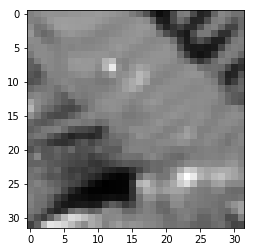

In [489]:
plt.imshow(Xraw[801].reshape(32, 32), cmap="gray");  # show 6th image; vector->square


### Verbessern der Statstik
Unterteilen Sie die 32x32 Pixel Ausschnitte in 8x8 Pixel Ausschnitte

    X = Xraw.reshape(1000, 4, 8, 4, 8)           # make 3D temporarily 5D
    X = np.rollaxis(X, 3, 2).reshape(-1, 8 * 8)  # and recollect right axes, -1 means auto scale 

#### Wie viele Bildausschnitte haben Sie jetzt?

#### Ansehen eines Beispielbildes

    plt.imshow(Xraw[4*4*801].reshape(8, 8), cmap="gray")  # show corner from 6th image 

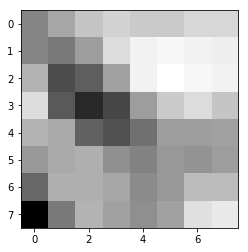

In [490]:
X = Xraw.reshape(1000, 4, 8, 4, 8)           # make 3D temporarily 5D
X = np.rollaxis(X, 3, 2).reshape(-1, 8 * 8)  # and recollect right axes, -1 means auto scale
plt.imshow(X[4*4*801].reshape(8, 8), cmap="gray");  # show corner from 6th image 


### b) führen Sie eine PCA durch
für die Bilder in X. Beschränken Sie sich auf 49 Hauptkomponenten.

In [491]:
pca = PCA(n_components=49)
Y = pca.fit_transform(X.T).T
print(Y.shape)

(49, 64)


#### Komponenten
Zeigen Sie die 49 *Haupt*komponenten, das sind quasi Filter für diese natürlichen Bildausschnitte. Es sollte in etwa so aussehen wie das Beispiel in der Vorlesung.

    plt.figure(figsize=(10, 10))
    for i, f in enumerate( ??? ):
        plt.subplot(7, 7, i+1)                    # draw images in 7x7 grid
        plt.imshow(f.reshape(8, 8), cmap="gray")
        plt.axis("off")

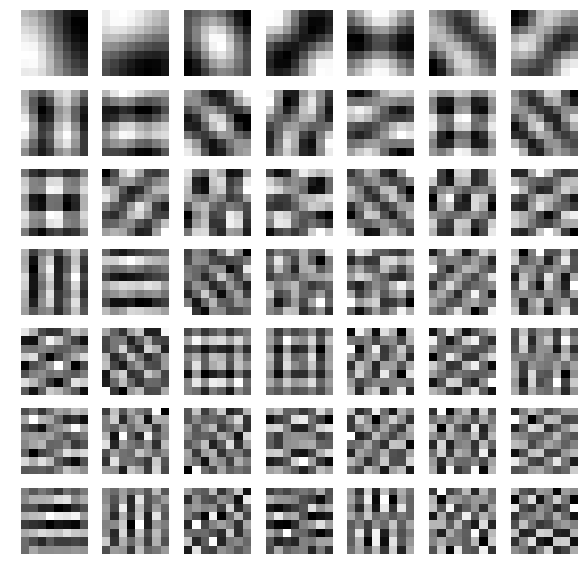

In [492]:
plt.figure(figsize=(10, 10))
for i, f in enumerate( Y ):
    plt.subplot(7, 7, i+1)  # draw images in 7x7 grid
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")


### c) führen Sie eine ICA durch
für die Bilder in X. Beschränken Sie sich auf 49 unabhängige Komponenten.

In [493]:
ica = FastICA(n_components=49)
Z = ica.fit_transform(X.T).T
print(Z.shape)

(49, 64)


#### Komponenten
Zeigen Sie die 49 *unabhängigen* Komponenten, das sind quasi Filter für diese natürlichen Bildausschnitte. Es sollte in etwa so aussehen wie das Beispiel in der Vorlesung.

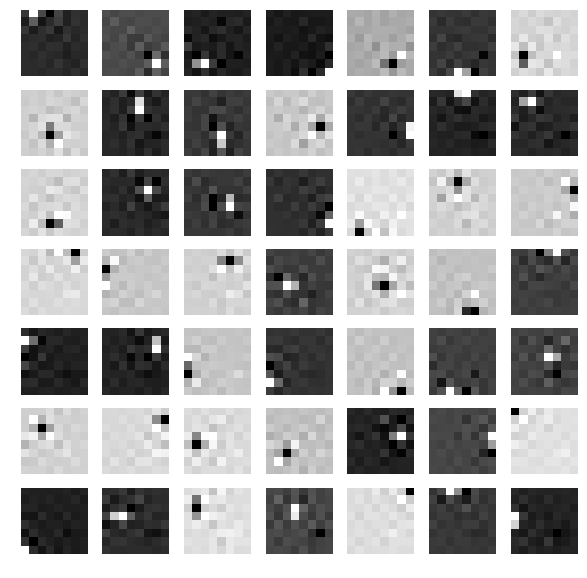

In [494]:
plt.figure(figsize=(10, 10))
for i, f in enumerate( Z ):
    plt.subplot(7, 7, i+1) # draw images in 7x7 grid
    plt.imshow(f.reshape(8, 8), cmap="gray")
    plt.axis("off")


(5 Punkte)

----